In [11]:
import numpy as np
import pandas as pd

df = pd.read_csv('pv_pp.csv')

# Data Exploration

### Check first few rows
    print(df.head())

### Get dataset info
    print("\nDataset Info:")
    print(df.info())

### Check for missing values
    pri t("\nMissing Values in Each Column:")
    print(df.isnull().sum())

### Get basic statistics
    print("\nSummary Statistics:")
    print(df.describe())

In [2]:
df.head()

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
1,01.01.2017-01:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,01.01.2017-02:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,01.01.2017-03:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,01.01.2017-04:00,4.0,0,1003.1,-6.3,3.6,67,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date-Hour(NMT)       8760 non-null   object 
 1   WindSpeed            8760 non-null   float64
 2   Sunshine             8760 non-null   int64  
 3   AirPressure          8760 non-null   float64
 4   Radiation            8760 non-null   float64
 5   AirTemperature       8760 non-null   float64
 6   RelativeAirHumidity  8760 non-null   int64  
 7   SystemProduction     8760 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 547.6+ KB


In [15]:
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Date-Hour(NMT)         0
WindSpeed              0
Sunshine               0
AirPressure            0
Radiation              0
AirTemperature         0
RelativeAirHumidity    0
SystemProduction       0
dtype: int64


In [16]:
df.describe()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2.639823,11.180479,1010.361781,97.538493,6.978893,76.719406,684.746071
std,1.628754,21.171295,12.793971,182.336029,7.604266,19.278996,1487.454665
min,0.000000,0.000000,965.900000,-9.300000,-12.400000,13.000000,0.000000
25%,1.400000,0.000000,1002.800000,-6.200000,0.500000,64.000000,0.000000
50%,2.300000,0.000000,1011.000000,-1.400000,6.400000,82.000000,0.000000
75%,3.600000,7.000000,1018.200000,115.600000,13.400000,93.000000,464.249950
max,10.900000,60.000000,1047.300000,899.700000,27.100000,100.000000,7701.000000


## Preprocess the Data
    Preprocessing ensures the dataset is clean and ready for machine learning.

    Common Steps:
    ✔ Handle missing values
    ✔ Convert data types (e.g., datetime format)
    ✔ Normalize numerical values (optional for ML)

### Handle missing values
Drop rows with missing values (if missing data is small)
    df_cleaned = df.dropna()

    OR Fill missing values with the mean/median
    df.fillna(df.mean(), inplace=True)

    print("Missing values handled!")


In [13]:
# Convert the timestamp column to datetime format
df['Date-Hour(NMT)'] = pd.to_datetime(df['Date-Hour(NMT)'], format='%d.%m.%Y-%H:%M')  
# - This ensures that the date and time are correctly recognized as a datetime object.
# - Helps in performing time-based analysis and extracting useful features.

# Extract time-based features for analysis
df['Hour'] = df['Date-Hour(NMT)'].dt.hour  # Extracts the hour from the timestamp
df['Day'] = df['Date-Hour(NMT)'].dt.day  # Extracts the day of the month
df['Month'] = df['Date-Hour(NMT)'].dt.month  # Extracts the month
df['Year'] = df['Date-Hour(NMT)'].dt.year  # Extracts the year
# - These features allow us to analyze patterns in solar power generation.
# - Example: Checking if solar output is higher in certain months or at certain times of the day.
df.head()


,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,Hour,Day,Month,Year
0,2017-01-01 00:00:00,0.6,0,1003.8,-7.4,0.1,97,0.0,0,1,1,2017
1,2017-01-01 01:00:00,1.7,0,1003.5,-7.4,-0.2,98,0.0,1,1,1,2017
2,2017-01-01 02:00:00,0.6,0,1003.4,-6.7,-1.2,99,0.0,2,1,1,2017
3,2017-01-01 03:00:00,2.4,0,1003.3,-7.2,-1.3,99,0.0,3,1,1,2017
4,2017-01-01 04:00:00,4.0,0,1003.1,-6.3,3.6,67,0.0,4,1,1,2017


In [9]:
df

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,Hour,Day,Month,Year
0,2017-01-01 00:00:00,0.6,0,1003.8,0.0,0.1,97,0.0,0,1,1,2017
1,2017-01-01 01:00:00,1.7,0,1003.5,0.0,-0.2,98,0.0,1,1,1,2017
2,2017-01-01 02:00:00,0.6,0,1003.4,0.0,-1.2,99,0.0,2,1,1,2017
3,2017-01-01 03:00:00,2.4,0,1003.3,0.0,-1.3,99,0.0,3,1,1,2017
4,2017-01-01 04:00:00,4.0,0,1003.1,0.0,3.6,67,0.0,4,1,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2017-12-31 19:00:00,4.1,0,988.2,0.0,-0.7,94,0.0,19,31,12,2017
8756,2017-12-31 20:00:00,2.1,0,987.3,0.0,-0.3,95,0.0,20,31,12,2017
8757,2017-12-31 21:00:00,1.8,0,986.7,0.0,0.2,93,0.0,21,31,12,2017
8758,2017-12-31 22:00:00,2.2,0,986.0,0.0,0.3,92,0.0,22,31,12,2017


## Data Visualization of Cleaned Data

In [15]:
# Import necessary libraries
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For statistical plots, including the heatmap


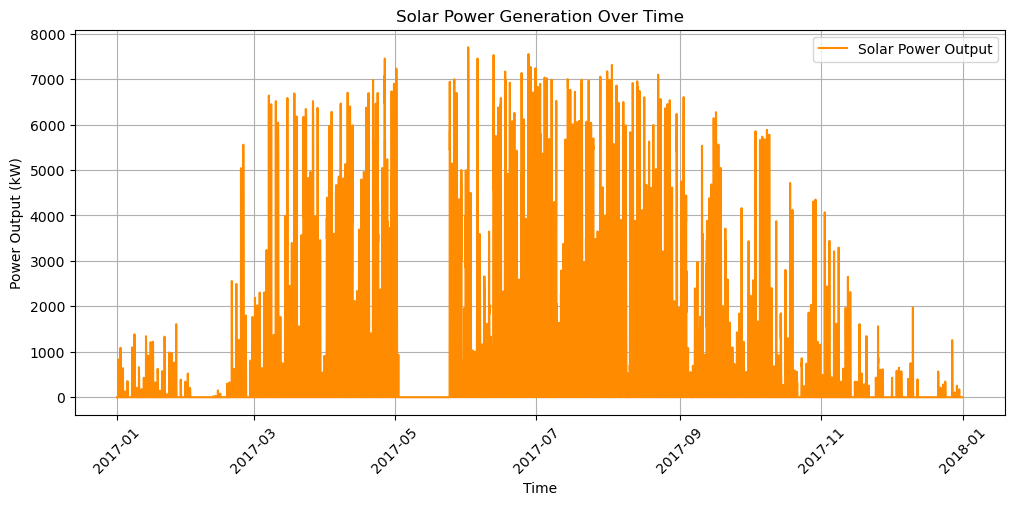

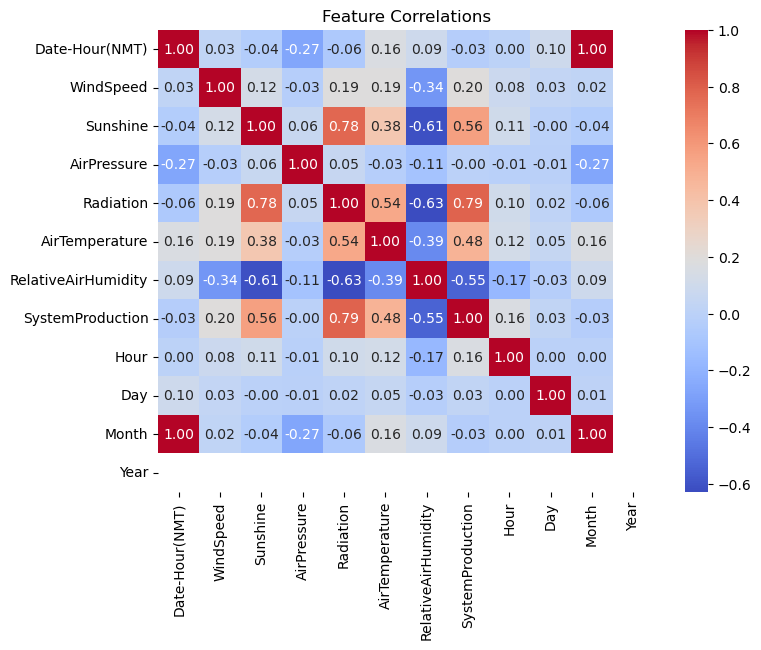

In [20]:
# Visualization: Plot Solar Power Generation Over Time
plt.figure(figsize=(12, 5))  # Set figure size (width=12, height=5 inches)
plt.plot(df['Date-Hour(NMT)'], df['SystemProduction'], label='Solar Power Output', color='darkorange')  
# - X-axis: Time (Date-Hour(NMT))
# - Y-axis: Solar power production (SystemProduction)
# - The orange line represents the changes in solar power output over time.

plt.xlabel('Time')  # Label for X-axis
plt.ylabel('Power Output (kW)')  # Label for Y-axis
plt.title('Solar Power Generation Over Time')  # Title of the plot
plt.legend()  # Show the legend for better readability
plt.xticks(rotation=45)  # Rotate X-axis labels to prevent overlap
plt.grid()  # Add grid lines for better visualization
plt.show()  # Display the plot

# Visualization: Heatmap to show correlations between different features
plt.figure(figsize=(8,6))  # Set figure size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")  
# - df.corr() calculates the correlation between numerical features.
# - annot=True displays the correlation values on the heatmap.
# - cmap='coolwarm' sets the color scheme where:
#   - Red indicates strong positive correlation.
#   - Blue indicates strong negative correlation.
# - fmt=".2f" ensures numbers are displayed with 2 decimal places.

plt.title("Feature Correlations")  # Add title to the heatmap
plt.show()  # Display the heatmap


In [21]:
# =========================
# Select Relevant Columns
# =========================

# Define the required features and target variable
columns_needed = ['Hour', 'Day', 'Month', 'Year', 'Sunshine', 'Radiation', 'AirTemperature', 'WindSpeed', 'SystemProduction']

# Create a new DataFrame with selected columns
df_cleaned = df[columns_needed]

# =========================
# Verify the Final DataFrame
# =========================
print("Dataset shape:", df_cleaned.shape)  # Display the number of rows and columns
print("Missing values:\n", df_cleaned.isnull().sum())  # Check for missing values
print(df_cleaned.head())  # Show the first few rows for inspection


Dataset shape: (8760, 9)
Missing values:
 Hour                0
Day                 0
Month               0
Year                0
Sunshine            0
Radiation           0
AirTemperature      0
WindSpeed           0
SystemProduction    0
dtype: int64
   Hour  Day  Month  Year  Sunshine  Radiation  AirTemperature  WindSpeed  \
0     0    1      1  2017         0       -7.4             0.1        0.6   
1     1    1      1  2017         0       -7.4            -0.2        1.7   
2     2    1      1  2017         0       -6.7            -1.2        0.6   
3     3    1      1  2017         0       -7.2            -1.3        2.4   
4     4    1      1  2017         0       -6.3             3.6        4.0   

   SystemProduction  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  


In [22]:
print(df_cleaned.columns)

Index(['Hour', 'Day', 'Month', 'Year', 'Sunshine', 'Radiation',
       'AirTemperature', 'WindSpeed', 'SystemProduction'],
      dtype='object')


## Training Model

In [24]:

# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.ensemble import RandomForestRegressor  # Random Forest model for regression tasks
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Evaluation metrics


# Step 2: Define features and target variable
features = ['Hour', 'Day', 'Month', 'Year', 'Sunshine', 'Radiation','AirTemperature', 'WindSpeed']  # Features used for training
target = "SystemProduction"  # Target variable

# Step 3: Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned[features],  # Independent variables (features)
    df_cleaned[target],  # Dependent variable (target)
    test_size=0.2,  # 20% of data reserved for testing
    random_state=101  # Ensures reproducibility
)

# Step 4: Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of decision trees in the forest
    random_state=101  # Ensures consistent results
)

# Step 5: Train the model using the training data
rf_model.fit(X_train, y_train)

# Step 6: Make predictions using the trained model
y_pred = rf_model.predict(X_test)


## Evaluation Metrics

In [25]:
# Step 7: Evaluate the model using key performance metrics
mae = mean_absolute_error(y_test, y_pred)  # Measures average absolute error
mse = mean_squared_error(y_test, y_pred)  # Measures squared error
rmse = np.sqrt(mse)  # RMSE is the square root of MSE, making it interpretable
r2 = r2_score(y_test, y_pred)  # Measures how well model explains variance (1 is perfect)


In [26]:

# Step 8: Display model evaluation results
# =========================
# 6. Print Accuracy Metrics
# =========================
print(f"Mean Absolute Error (MAE): {mae}")  
# A lower MAE means predictions are closer to actual values

print(f"Root Mean Squared Error (RMSE): {rmse}")  
# A lower RMSE indicates better model performance

print(f"R-squared Score (R²): {r2}")  
# An R² value close to 1 means the model explains most of the variance in the data

Mean Absolute Error (MAE): 234.49687044018262
Root Mean Squared Error (RMSE): 548.742219981648
R-squared Score (R²): 0.8756960194712756


# Training with SVR and XGBRegressor for comparism

In [32]:
# 📌 Import necessary libraries

from sklearn.svm import SVR  # Support Vector Machine Model
from xgboost import XGBRegressor  # XGBoost Model



# 📌 Train the Support Vector Regressor (SVR)
svr_model = SVR(kernel='rbf')  # RBF kernel for non-linear regression
svr_model.fit(X_train, y_train)

# 📌 Train the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, random_state=101)
xgb_model.fit(X_train, y_train)

# 📌 Make Predictions on the Test Set
y_pred_rf = rf_model.predict(X_test)  # Reassigning the previous Predictions from Random Forest for more clarity and flow
y_pred_svr = svr_model.predict(X_test)  # Predictions from SVR
y_pred_xgb = xgb_model.predict(X_test)  # Predictions from XGBoost



## Evaluating the 3 Models

In [33]:
# 📌 Evaluate Each Model's Performance
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)  # Measures prediction error
    r2 = r2_score(y_true, y_pred)  # Measures how well predictions match actual values
    print(f"{model_name} - MAE: {mae:.2f}, R² Score: {r2:.4f}")

# 📌 Print Model Comparison Results
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svr, "Support Vector Regressor")
evaluate_model(y_test, y_pred_xgb, "XGBoost")


Random Forest - MAE: 234.50, R² Score: 0.8757
Support Vector Regressor - MAE: 712.62, R² Score: -0.1569
XGBoost - MAE: 246.10, R² Score: 0.8613


# Model Application and Testing

### What Can the Trained Model Do?  
The Random Forest Regression model is trained to predict solar power output (SystemProduction) based on different features like time, weather conditions, and other input parameters. Here’s what it can do:  

1. **Predict Solar Power Output**  
   Given new input values (Hour, Day, Month, Weather), the model can predict how much solar energy (SystemProduction) will be generated.  

   Use Case: If a solar plant operator wants to estimate power generation for a future date and time, this model helps.  

2. **Optimize Solar Energy Usage & Storage**  
   The model can help decide when to store energy in batteries or sell excess power to the grid.  
   If the model predicts low solar output, the system can prepare by:  
   - Drawing power from batteries.  
   - Switching to backup sources (e.g., grid power or generators).  

3. **Detect Seasonal Trends & Anomalies**  
   By analyzing predictions over weeks or months, you can:  
   - Identify high-production months (e.g., summer vs. winter).  
   - Detect unusual drops in production, which could mean maintenance issues with solar panels.  

4. **Assist in Grid Stability & Demand Forecasting**  
   Utilities can use predictions to:  
   - Balance power supply and demand.  
   - Prevent blackouts by integrating solar with other energy sources.  